In [91]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification

In [12]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [18]:
df= pd.DataFrame(X,columns=['col1','col2','col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,3.117407,-0.180387,-0.492370,-0.513997,-1.888106,1
1,2.892537,-1.467065,-0.209671,0.237751,0.166847,0
2,0.740692,0.705852,0.906761,-1.209881,0.875339,1
3,2.396576,0.512174,0.115270,2.012708,0.294518,0
4,2.112538,2.469926,0.227165,-0.227422,-0.061435,0


In [25]:
# function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [88]:
#function for feature sampling

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [119]:
#function for combined sampling

def combined_sampling(df,row_percent,col_precent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_precent)

In [57]:
df1 = sample_rows(df,0.2)

In [58]:
df2 = sample_rows(df,0.2)

In [59]:
df3 = sample_rows(df,0.2)

In [60]:
df2.shape

(20, 6)

In [61]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [67]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [68]:
from sklearn.tree import plot_tree

**Sample Rows**

[Text(0.625, 0.875, 'x[4] <= 0.011\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.5, 0.625, 'x[0] <= 1.734\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'x[2] <= 0.43\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.375, 'x[4] <= -0.347\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6875, 0.75, '  False')]

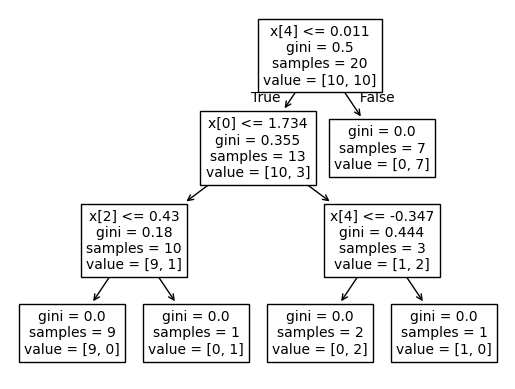

In [69]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[4] <= 0.02\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= -1.417\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

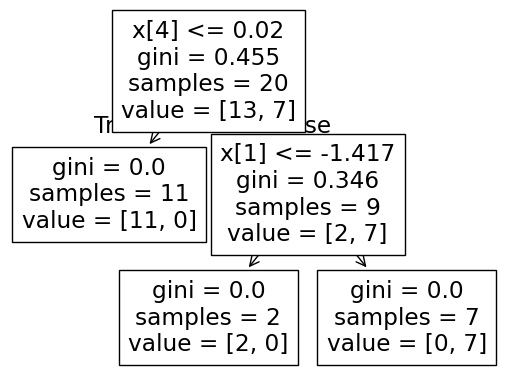

In [70]:
plot_tree(clf2)

[Text(0.6, 0.875, 'x[2] <= 0.504\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.4, 0.625, 'x[4] <= 0.593\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6, 0.375, 'x[1] <= -1.372\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7, 0.75, '  False')]

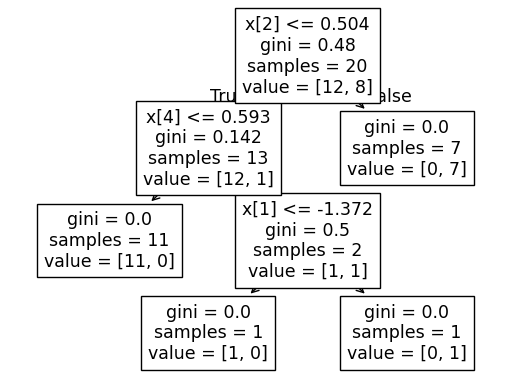

In [71]:
plot_tree(clf3)

In [72]:
df3

,col1,col2,col3,col4,col5,target
94,2.913321,0.023893,0.781011,-0.694398,-0.345039,1
1,2.892537,-1.467065,-0.209671,0.237751,0.166847,0
10,1.329392,-1.383639,-0.823948,-0.713452,-0.675658,0
8,-2.485852,-0.673686,-2.529594,-0.413662,-0.194243,0
78,0.620716,-1.775440,-1.098454,-0.285290,-1.405703,0
84,0.000677,-0.683141,1.258035,-0.584196,2.382878,1
57,1.776637,-4.988456,-1.203821,-1.290948,-1.361034,0
60,1.399826,-0.148464,-0.718609,0.711299,0.644363,1
57,1.776637,-4.988456,-1.203821,-1.290948,-1.361034,0
86,0.984671,-2.595266,-1.934389,1.406434,1.044991,0


In [78]:
clf1.predict(np.array([0.000677,-0.683141,1.258035,-0.584196,2.382878]).reshape(1,5))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [79]:
clf2.predict(np.array([0.000677,-0.683141,1.258035,-0.584196,2.382878]).reshape(1,5))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [80]:
clf3.predict(np.array([0.000677,-0.683141,1.258035,-0.584196,2.382878]).reshape(1,5))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

**Sample Features**

In [100]:
ds1 = sample_features(df,0.8)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1616\1250118407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [99]:
ds2 = sample_features(df,0.8)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1616\1250118407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [98]:
ds3 = sample_features(df,0.8)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1616\1250118407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [101]:
ds1.shape

(100, 5)

In [103]:
print(ds1.columns)
print(ds2.columns)
print(ds3.columns)

Index(['col2', 'col1', 'col5', 'col4', 'target'], dtype='object')
Index(['col2', 'col4', 'col1', 'col3', 'target'], dtype='object')
Index(['col4', 'col1', 'col2', 'col5', 'target'], dtype='object')


In [104]:
ds2

,col2,col4,col1,col3,target
0,-0.180387,-0.513997,3.117407,-0.492370,1
1,-1.467065,0.237751,2.892537,-0.209671,0
2,0.705852,-1.209881,0.740692,0.906761,1
3,0.512174,2.012708,2.396576,0.115270,0
4,2.469926,-0.227422,2.112538,0.227165,0
...,...,...,...,...,...
95,-0.214230,-1.250812,0.661370,-0.934683,0
96,2.543835,-1.527061,-0.051973,2.073670,1
97,-1.019967,2.839102,3.940401,-2.262615,1
98,0.406086,0.073107,1.811772,-0.314139,1


In [106]:
cls1 = DecisionTreeClassifier()
cls2 = DecisionTreeClassifier()
cls3 = DecisionTreeClassifier()

In [108]:
cls1.fit(ds1.iloc[:,0:4],ds1.iloc[:,-1])
cls2.fit(ds2.iloc[:,0:4],ds1.iloc[:,-1])
cls3.fit(ds3.iloc[:,0:4],ds1.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.3958333333333333, 0.95, 'x[0] <= -1.199\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.16666666666666666, 0.85, 'x[3] <= 2.909\ngini = 0.067\nsamples = 29\nvalue = [28, 1]'),
 Text(0.28125, 0.8999999999999999, 'True  '),
 Text(0.08333333333333333, 0.75, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.85, 'x[2] <= 0.593\ngini = 0.428\nsamples = 71\nvalue = [22, 49]'),
 Text(0.5104166666666666, 0.8999999999999999, '  False'),
 Text(0.4166666666666667, 0.75, 'x[1] <= 0.685\ngini = 0.497\nsamples = 39\nvalue = [21, 18]'),
 Text(0.25, 0.65, 'x[0] <= 2.748\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.16666666666666666, 0.55, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3333333333333333, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.65, 'x[2] <= 0.213\ngini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Text(0.5, 0.55, 'x[0] <= 0.136\ngini = 0.351\nsample

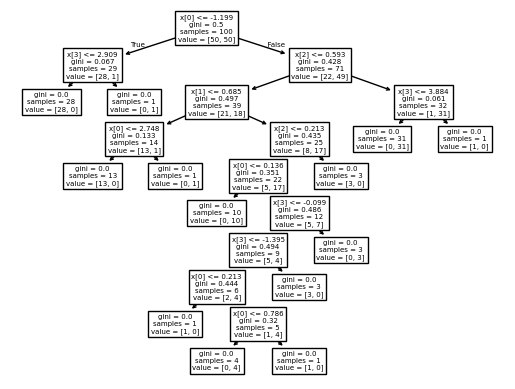

In [109]:
plot_tree(cls1)

[Text(0.6764705882352942, 0.9285714285714286, 'x[3] <= 0.235\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.47058823529411764, 0.7857142857142857, 'x[2] <= 1.794\ngini = 0.382\nsamples = 66\nvalue = [49, 17]'),
 Text(0.5735294117647058, 0.8571428571428572, 'True  '),
 Text(0.23529411764705882, 0.6428571428571429, 'x[3] <= -0.427\ngini = 0.18\nsamples = 40\nvalue = [36, 4]'),
 Text(0.11764705882352941, 0.5, 'x[3] <= -0.74\ngini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.058823529411764705, 0.35714285714285715, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.17647058823529413, 0.35714285714285715, 'x[0] <= -0.806\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.11764705882352941, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.23529411764705882, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.35294117647058826, 0.5, 'x[3] <= -0.178\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.29411764705882354, 0.357142

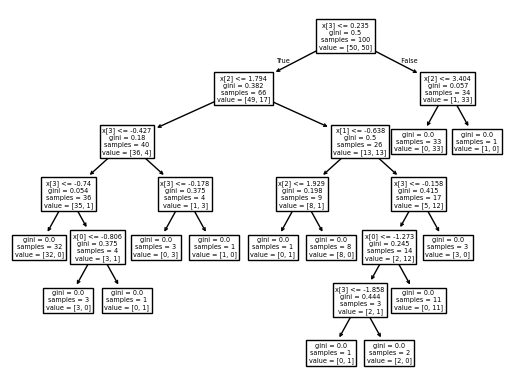

In [110]:
plot_tree(cls2)

[Text(0.3958333333333333, 0.95, 'x[2] <= -1.199\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.16666666666666666, 0.85, 'x[0] <= 2.909\ngini = 0.067\nsamples = 29\nvalue = [28, 1]'),
 Text(0.28125, 0.8999999999999999, 'True  '),
 Text(0.08333333333333333, 0.75, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.85, 'x[3] <= 0.593\ngini = 0.428\nsamples = 71\nvalue = [22, 49]'),
 Text(0.5104166666666666, 0.8999999999999999, '  False'),
 Text(0.4166666666666667, 0.75, 'x[1] <= 0.685\ngini = 0.497\nsamples = 39\nvalue = [21, 18]'),
 Text(0.25, 0.65, 'x[2] <= 2.748\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.16666666666666666, 0.55, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3333333333333333, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.65, 'x[3] <= 0.213\ngini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Text(0.5, 0.55, 'x[2] <= 0.136\ngini = 0.351\nsample

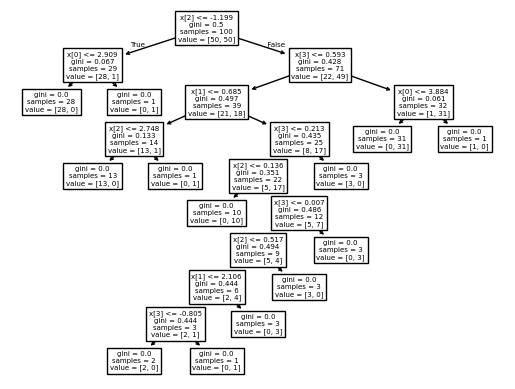

In [111]:
plot_tree(cls3)

In [112]:
ds1

,col2,col1,col5,col4,target
0,-0.180387,3.117407,-1.888106,-0.513997,1
1,-1.467065,2.892537,0.166847,0.237751,0
2,0.705852,0.740692,0.875339,-1.209881,1
3,0.512174,2.396576,0.294518,2.012708,0
4,2.469926,2.112538,-0.061435,-0.227422,0
...,...,...,...,...,...
95,-0.214230,0.661370,-1.461650,-1.250812,0
96,2.543835,-0.051973,2.388067,-1.527061,1
97,-1.019967,3.940401,-0.839294,2.839102,1
98,0.406086,1.811772,0.114033,0.073107,1


In [113]:
cls1.predict(np.array([2.543835,-0.051973,2.388067,-1.527061]).reshape(1,4))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [114]:
cls2.predict(np.array([2.543835,-0.051973,2.388067,-1.527061]).reshape(1,4))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [115]:
cls3.predict(np.array([2.543835,-0.051973,2.388067,-1.527061]).reshape(1,4))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

**Combined Sampling**

In [163]:
data1 = combined_sampling(df,0.5,0.5)
data2 = combined_sampling(df,0.5,0.5)
data3 = combined_sampling(df,0.5,0.5)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1616\1250118407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1616\1250118407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_1616\1250118407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [164]:
data1.shape

(50, 3)

In [165]:
cf1 = DecisionTreeClassifier()
cf2 = DecisionTreeClassifier()
cf3 = DecisionTreeClassifier()

In [167]:
cf1.fit(data1.iloc[:,0:2],data1.iloc[:,-1])
cf2.fit(data2.iloc[:,0:2],data2.iloc[:,-1])
cf3.fit(data3.iloc[:,0:2],data1.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5555555555555556, 0.9166666666666666, 'x[1] <= 0.629\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.4444444444444444, 0.75, 'x[1] <= -0.892\ngini = 0.43\nsamples = 32\nvalue = [22, 10]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.2222222222222222, 0.5833333333333334, 'x[1] <= -2.299\ngini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[1] <= -1.466\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.2222222222222222, 0.25, 'x[1] <= -1.597\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'x[1] <= -0.336\ngini = 0.5\nsamples =

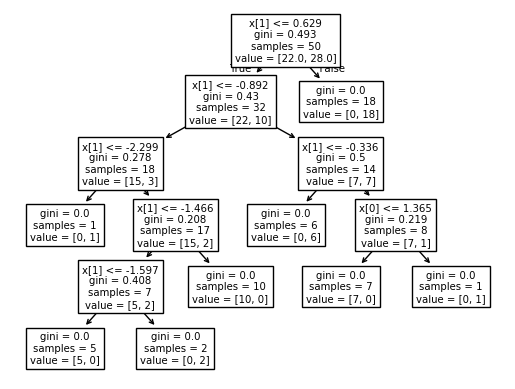

In [168]:
plot_tree(cf1)

[Text(0.6666666666666666, 0.9285714285714286, 'x[0] <= -1.199\ngini = 0.471\nsamples = 50\nvalue = [31, 19]'),
 Text(0.5555555555555556, 0.7857142857142857, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.6111111111111112, 0.8571428571428572, 'True  '),
 Text(0.7777777777777778, 0.7857142857142857, 'x[0] <= 1.017\ngini = 0.436\nsamples = 28\nvalue = [9, 19]'),
 Text(0.7222222222222222, 0.8571428571428572, '  False'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[0] <= 0.783\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.5555555555555556, 0.5, 'x[1] <= 1.912\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 0.542\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[1] <= 0.188\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples =

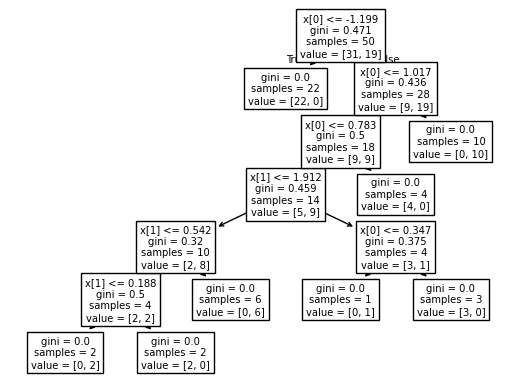

In [169]:
plot_tree(cf2)

[Text(0.41304347826086957, 0.9444444444444444, 'x[0] <= -0.718\ngini = 0.493\nsamples = 50\nvalue = [22.0, 28.0]'),
 Text(0.2608695652173913, 0.8333333333333334, 'x[0] <= -1.012\ngini = 0.472\nsamples = 21\nvalue = [13, 8]'),
 Text(0.33695652173913043, 0.8888888888888888, 'True  '),
 Text(0.21739130434782608, 0.7222222222222222, 'x[0] <= -2.129\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.08695652173913043, 0.6111111111111112, 'x[0] <= -4.155\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.043478260869565216, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.13043478260869565, 0.5, 'x[1] <= -2.07\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.08695652173913043, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.17391304347826086, 0.3888888888888889, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.34782608695652173, 0.6111111111111112, 'x[0] <= -1.073\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.30434782608695654, 0.5, 'x[1]

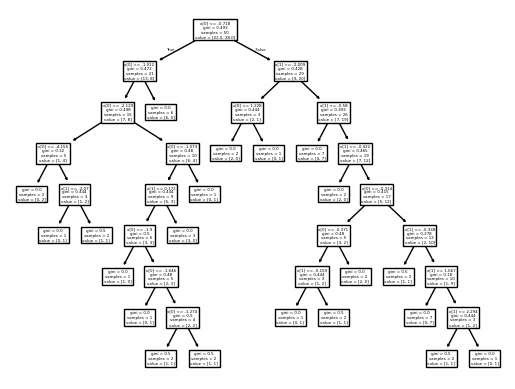

In [170]:
plot_tree(cf3)

In [157]:
data3.shape

(10, 3)

In [172]:
cf1.predict(np.array([-1.171189,0.715614]).reshape(1,2))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [173]:
cf2.predict(np.array([-1.171189,0.715614]).reshape(1,2))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [174]:
cf3.predict(np.array([-1.171189,0.715614]).reshape(1,2))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [159]:
data1

,col4,col5,target
99,-2.067415,-1.806975,0
88,-4.543718,-2.086595,0
40,0.973159,0.383606,0
32,-4.719325,3.884053,1
79,-2.939716,-1.051041,0
53,0.014191,1.451956,1
28,-0.826040,-0.310636,0
76,1.803749,1.772160,1
31,-4.130386,1.760833,1
58,-1.171189,0.715614,1
